# Taller 2

## Métodos Computacionales 2

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombreApellidoNombre_Taller2.ipynb, con el primer Apellido y Nombre de cada integrante de la pareja. **El archivo debe poder correr en el binder del curso o en google colab**

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

La simulación no debe demorar más de **30 segundos** en compilar y correr.

No modifique el cuaderno, ni los modos de lectura de los archivos.

**Entrega: Jueves 7 de Septiembre 11:59 pm**

## Librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.io import wavfile
from IPython.display import Audio
import matplotlib.animation as ani
plt.style.use('dark_background')

In [2]:
from matplotlib import rc
rc("animation", html = "jshtml")

### Problema 1

Considere el siguiente conjunto de datos que corresponde a la magnitud de un temblor en la escala de Ricther, tomado en un tiempo de 1 día.

Estos datos fueron tomados de "Earthquake harzard Program", https://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php.

A continuación se realiza un gráfico de la magnitud del temblor en la escala de Ricther.

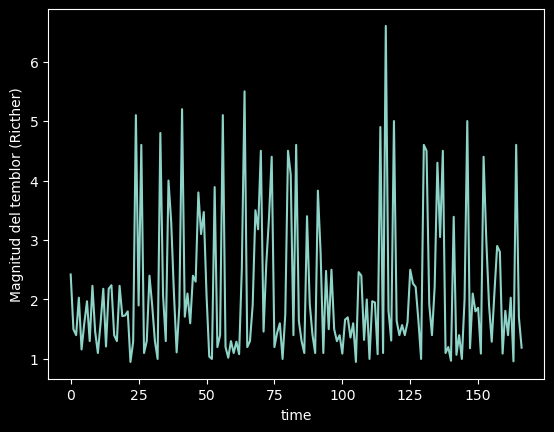

In [3]:
## lectura del archivo del temblor (no modificar)
earth_quake_data = pd.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/1.0_day.csv")
magnitude = earth_quake_data["mag"].to_numpy()

plt.plot(np.arange(len(magnitude)), magnitude)
plt.ylabel("Magnitud del temblor (Ricther)")
plt.xlabel("time")
plt.show()

a) Realice un gráfico del espacio de frecuencias del temblor. Usando **plt.stem()**

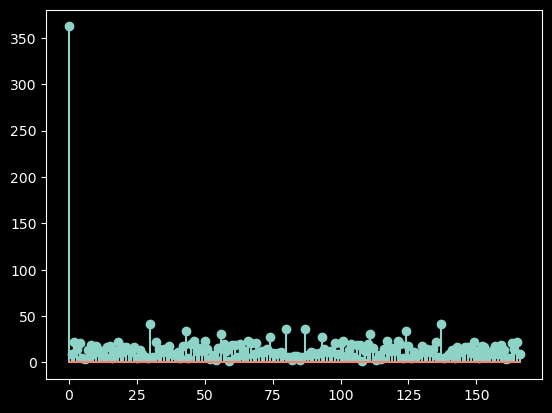

In [4]:
## Su codigo aqui
def DFT_lenta(x):
    x = np.array(x) 
    N = x.shape[0]
    ns = np.arange(N).reshape(-1, 1)
    ks = np.arange(N)
    return np.exp(-2.0j*np.pi*ns*ks / N) @ x

def obtener_frecuencias_y_amplitudes(x, N):
    #t = np.arange(0, 2*np.pi, (2*np.pi)/N)

    X = DFT_lenta(x)
    return np.arange(N), np.abs(X)

frecs, amps = obtener_frecuencias_y_amplitudes(magnitude, magnitude.shape[0])
plt.stem(frecs, amps, use_line_collection = True)

plt.show()

b) Incluya en el gráfico anterior las 16 frecuencias más importantes del temblor usando **plt.stem()** con otro color. Es decir gráfique las amplitudes de las 16 frecuencias más importantes que describen el temblor de un color y las otras frecuencias de otro color.

[  0.  30. 137.  80.  87. 124.  43. 111.  56.  93.  74.  66. 101. 121.
  46.  50. 117.   2. 165. 149.  18.  32. 135.  98.  69.   4. 163.  67.
 100. 122.  45.  57. 110.] 167
Se grafican 33 amplitudes, debido a que las frecuencias vienen en pares conjugados (excepto para la frecuencia 0).
Y debido a la periodicidad de la transformada de fourier (Que en este caso es de periodo 167, que es el número de datos en el array de magnitude) 
el par conjugado de la n-ésima frecuencia se va a encontrar en la posición 167 - n.
Esto se puede comprobar en el array anterior, en donde se ve que para la frecuencia 30, su par conjugado se encuentra en 137= 167-30.


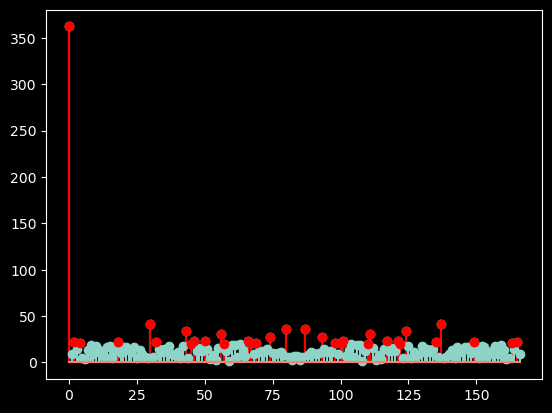

In [5]:
# su codigo aqui

amps_ord=np.sort(amps)[::-1]
frecs_ord=np.zeros(33)
for j in range(33):
    frecs_ord[j]=frecs[np.where(amps== amps_ord[j])]

print(frecs_ord,frecs.shape[0])
print("Se grafican 33 amplitudes, debido a que las frecuencias vienen en pares conjugados (excepto para la frecuencia 0).\nY debido a la periodicidad de la transformada de fourier (Que en este caso es de periodo 167, que es el número de datos en el array de magnitude) \nel par conjugado de la n-ésima frecuencia se va a encontrar en la posición 167 - n.\nEsto se puede comprobar en el array anterior, en donde se ve que para la frecuencia 30, su par conjugado se encuentra en 137= 167-30.")
plt.stem(frecs,amps)
plt.stem(frecs_ord,amps_ord[0:33],'r',markerfmt='ro')
plt.show()


c) Reemplace las amplitudes de las 70 frecuencias más altas por cero, y grafique la magnitud del temblor sin estás frecuencias, también incluya el gráfico inicial en su plot.

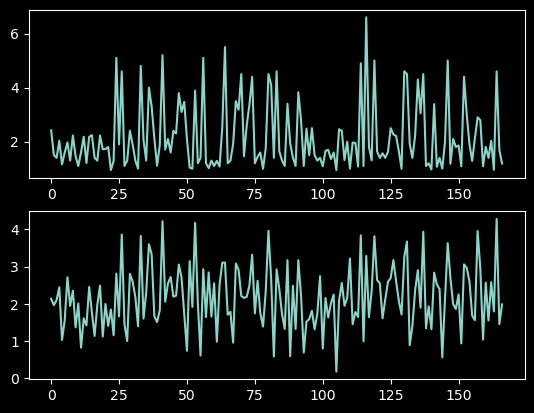

In [6]:
# su codigo aqui
amps_f_altas=amps_ord[28:]
f_altas=np.zeros(len(amps_ord[28:]))
#print(len(amps))
for j in range(28,len(amps)):
    f_altas[j-28]=frecs[np.where(amps== amps_ord[j])]
new_amps=DFT_lenta(magnitude)
for j in range(len(amps)):
    if j in f_altas:
        new_amps[j]=0
#print(new_amps)
def inv_DFT_lenta(X):
    X = np.array(X) 
    N = X.shape[0]
    ns = np.arange(N).reshape(-1, 1)
    ks = np.arange(N)
    return (1/N)*(np.exp(2.0j*np.pi*ns*ks / N) @ X)

fig,ax=plt.subplots(2)
ax[0].plot(np.arange(len(magnitude)), magnitude)
ax[1].plot(np.arange(len(amps)),np.abs(inv_DFT_lenta(new_amps)))
plt.show()
#print(np.abs(inv_DFT_lenta(DFT_lenta(magnitude))))
#print(inv_DFT_lenta(amps))


d) Usando la tranformada de Fourier, cálcule e imprima el promedio en escala de Ritcher del temblor

In [7]:
# su codigo aqui
print("El valor promedio de una funcion viene dado por\nla transformada de Fourier calculada para k=0 y multiplicada por 1/N\ndonde N es el número de datos. Entonces, la magnitud promedio es:")
print(np.abs(DFT_lenta(magnitude)[0]/len(magnitude)))



El valor promedio de una funcion viene dado por
la transformada de Fourier calculada para k=0 y multiplicada por 1/N
donde N es el número de datos. Entonces, la magnitud promedio es:
2.1690419162874246


## Problema 2

En el github del curso encontrara un archivo de audio Thriller.wav. \\

Para leer el archivo este jupyter notebook debe estar en el directorio **Datafiles** del github. Es decir no modifique la forma de lectura del archivo.

Escriba un programa que realice los siguientes pasos:

*    Para leer los datos del archivo [Thriller.wav](https://github.com/diegour1/MetodosComputacionales2/blob/main/Datafiles/Thriller.wav). Use el siguiente comando para leer los datos
```
sr, x = wavfile.read("Thriller.wav")
```

Para leer el archivo, su notebook debe estar en la carpeta Datafiles en el github del curso.

In [3]:
# No modifique este codigo asi debe poder leerse su programa
sr, x = wavfile.read("Thriller.wav")
print(x[:, 0].shape)

(631919,)


In [4]:
# ejemplo para escuchar el audio no modificar
Audio(x[:, 0], rate=44100)

a) Realice un gráfico de las amplitudes de las frecuencias haciendo de la transformada de Fourier del audio.

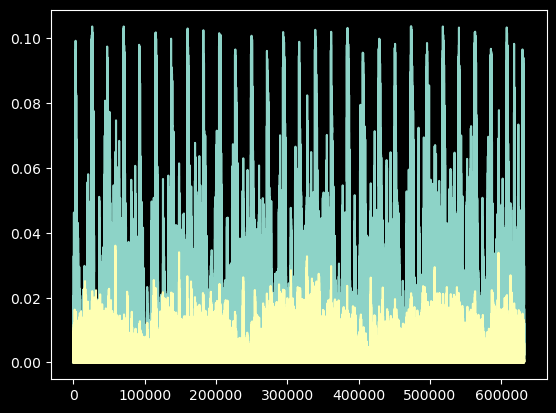

In [53]:
# su codigo aqui
pista=x

"""
ft_wave1 = np.fft.fft(pista[:,0])
ft_wave2 = np.fft.fft(pista[:,1])


fig, ax =plt.subplots(2)


ax[0].plot((np.abs(ft_wave1))/len(pista))

ax[1].plot((np.abs(ft_wave2))/len(pista))
"""
ft_wave=np.fft.fft(pista)
plt.plot(np.abs(ft_wave)/len(pista))
plt.show()


b) A partir del audio original elimine las 20000 frecuencias más bajas (asignandoles valores iguales a cero) del audio muestre el gráfico y reproduzca el audio.

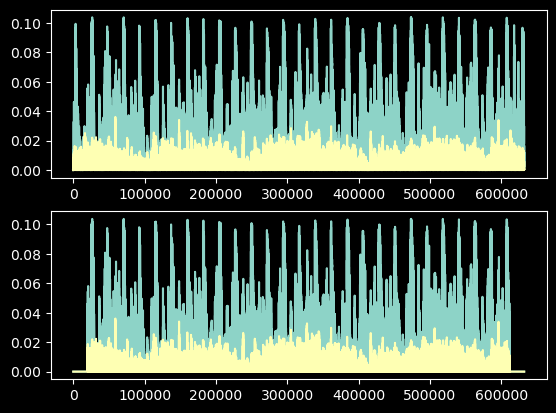

In [54]:
# su codigo aqui

"""
bajas1=np.sort(ft_wave1)[:40001]
bajas2=np.sort(ft_wave2)[:40001]

ft_wave1_new=np.copy(ft_wave1)
ft_wave2_new=np.copy(ft_wave2)



for j in range(ft_wave1_new.shape[0]):
    if np.abs(ft_wave1[j]) <= np.abs(bajas1[-1]):
        ft_wave1_new[j]=0
    if np.abs(ft_wave2_new[j]) <= np.abs(bajas2[-1]):
        ft_wave2_new[j]=0

"""
bajas1=np.sort(ft_wave[:,0])
bajas2=np.sort(ft_wave[:,1])
ft_wave_new=np.copy(ft_wave)
ft_wave_new[:20001,0]=0
ft_wave_new[-20001:,0]=0
ft_wave_new[:20001,1]=0
ft_wave_new[-20001:,1]=0
# su grafico aqui
fig1, ax1= plt.subplots(2)


ax1[0].plot((np.abs(ft_wave))/len(pista))
ax1[1].plot((np.abs(ft_wave_new))/len(pista))

plt.show()


In [55]:
# su audio aqui
wave_a = np.fft.ifft(ft_wave_new)
Audio(wave_a.real[:,0], rate=44100)

c) A partir del audio original elimine las frecuencias más altas (las complementarias del 20000 más bajas), muestre el gráfico y reproduzca el audio.

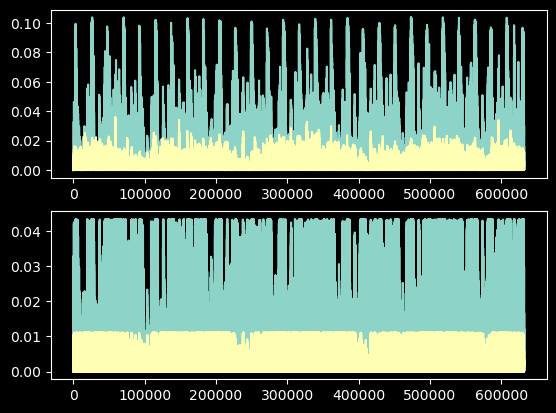

In [46]:
#eliminar frecuencia alta:
"""
altas1=np.sort(ft_wave1)[:40001]
altas2=np.sort(ft_wave2)[:40001]

ft_wave3_new=np.copy(ft_wave1)
ft_wave4_new=np.copy(ft_wave2)



for j in range(ft_wave1_new.shape[0]):
    if np.abs(ft_wave1[j]) >= np.abs(altas1[-1]):
        ft_wave3_new[j]=0
    if np.abs(ft_wave2_new[j]) >= np.abs(altas2[-1]):
        ft_wave4_new[j]=0

 
"""
altas1=np.sort(ft_wave[:,0])[::-1]
altas2=np.sort(ft_wave[:,1])[::-1]
ft_wave_new=np.copy(ft_wave)
ft_wave_new[np.abs(ft_wave[:,0])>np.abs(altas1[20001])]=0
ft_wave_new[np.abs(ft_wave[:,1])>np.abs(altas2[20001])]=0

# su grafico aqui
"""
fig1, ax1= plt.subplots(2)


ax1[0].plot((np.abs(ft_wave))/len(pista))
ax1[1].plot((np.abs(ft_wave_new))/len(pista))

plt.show()
# su grafico aqui
fig1, ax1= plt.subplots(2)


ax1[0].plot((np.abs(ft_wave3_new))/len(pista))
ax1[1].plot((np.abs(ft_wave4_new))/len(pista))

plt.show()
"""
fig1, ax1= plt.subplots(2)


ax1[0].plot((np.abs(ft_wave))/len(pista))
ax1[1].plot((np.abs(ft_wave_new))/len(pista))

plt.show()




In [48]:
# su audio aqui
wave_a = np.fft.ifft(ft_wave_new)
Audio(wave_a.real[:,0], rate=44100)


d) Diseñe un método usando la transformada de Fourier que reproduzca la canción al revés.

In [56]:
# su audio aqui
ft_wave=np.fft.fft(pista[::-1])

wave_a=np.fft.ifft(ft_wave)
Audio(wave_a.real[:,0], rate=44100)


## Problema 3

En este problema vamos a considerar el paquete de onda unidimensional Gaussiano, para una particula libre (potencial $0$), el paquete de onda está dado por,

$$
  \psi(x, 0) = \Big[\frac{1}{\pi^{1/4}\sqrt{d}}\Big]\exp{\Big[ikx - \frac{x^2}{2d^2}\Big]}
$$

donde consideramos el tiempo igual a $0$. Para todo el ejercicio tome $ħ = 1$ y $m = 1$.

El paquete de onda se puede interpretar como una función de la posición $x$ tal que $P(x) = \psi(x, 0)\times\psi(x, 0)^*$ corresponde a la densidad de probabilidad de encontrar una particula en la posición $x$, y donde $\psi(x, 0)^*$ es el complejo conjugado de $\psi(x, 0)$.

Considere dos funciones de onda a partir de los archivos, [gauss_wave1.txt](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave1.txt) y [gauss_wave2.txt](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave2.txt).

Los archivos de las dos ondas se pueden leer con el comando,

```
wave1 = pandas.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave1.txt")
```

Estos datos indican en la primera columna, la posición en $x$ y en la segunda columna el valor real de la función de onda y en la tercera columna el valor imaginario de la función de onda es decir la 2da y 3ra columna guardan $\psi(x)$. En el codigo a continuación se guarda las posiciones en las variables `x1` y `x2`, y las funciones de onda completas con parte real e imaginaria (número complejo) en` psi_x1` y `psi_x2`.



In [ ]:
# codigo para leer los datos no modificar

wave1 = pd.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave1.txt", sep=" ").to_numpy()
wave2 = pd.read_csv("https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/gauss_wave2.txt", sep=" ").to_numpy()

x1, psi_x1 = wave1[:, 0], wave1[:, 1] + 1j* wave1[:, 2]
x2, psi_x2 = wave2[:, 0], wave2[:, 1] + 1j* wave2[:, 2]

x1.shape, psi_x1.shape, x2.shape, psi_x2.shape

((500,), (500,), (500,), (500,))

a) Gráfique en un mismo gráfico las densidades de probabilidad de las dos funciones, es decir, $x_1 \ \text{vs} \ P_1(x_1)$ y $x_2 \ \text{vs} \ P_2(x_2)$.


In [ ]:
# su codigo aqui


b) El espacio de momentos $\phi(p)$ es una función tal que $ \ Q(p) = \phi(p)\times\phi(p)* \ $ corresponde a la probabilidad de que el momentum de una particula sea $p$. El espacio de momentos se puede obtener al realizar la transformada de Fourier del espacio de posiciones,

$$
  \phi(p) = \frac{1}{\sqrt{2\piħ}}\int{\psi(x)\exp{(\frac{-ipx}{ħ})\,dx}}
$$

Gráfique en un mismo gráfico las densidades de probabilidad de las dos funciones de momentos, es decir, $p_1 \ \text{vs} \ Q_1(p_1)$ y $p_2 \ \text{vs} \ Q_2(p_2)$ entre $[-20, 20]$ con 500 puntos en $p$.

In [ ]:
# su codigo aqui



c) Imprima los dos escalares que corresponden al valor esperado de los momentos para las dos funciones de onda.


In [ ]:
### su codigo aqui


d) Qué significa físicamente la relación entre el ancho de los gráficos de las partes a y b? (No se califica)

Su texto aquí

.

.

.

.

.

.

e) Realice una simulación mostrando la evolución temporal en el espacio de posiciones de la primera ecuación de onda $\psi_1(x)$ entre $[-20, 20]$.

La simulación debe generarse de forma automatica en el jupyter notebook en el binder del curso, y no debe demorar más de 30 segundos en generarse,

Para ello tome los siguientes parametros $t$ entre $[0, 10]$ con 100 puntos, y la simulación con $100$ frames.

Para asegurarse puede subir un link de youtube de su simulación.

La simulación debería verse parecida al siguiente video.

.

Cambie por su link aquí

https://youtu.be/htkWqg9aG4c

.

.

In [ ]:
### su codigo aqui


f) Qué interpretación física puede extraer del ejercicio? (No se califica)

Su texto aqui,

.

.

.

.
